# Data Exploration


In [ ]:
import pandas as pd
df = pd.read_csv('/Users/noah/Desktop/Work on Resume/bank+marketing/bank/bank-full.csv', delimiter=';')

# Display first few rows
print(df.head())

# Get general info about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics for numerical columns
print(df.describe())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

In [ ]:
print(df.columns)

# Encode Categorical Features

In [52]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, drop_first=True)

# Check if encoding was successful
print(df.head())

   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   58     2143    5       261         1     -1         0            False   
1   44       29    5       151         1     -1         0            False   
2   33        2    5        76         1     -1         0            False   
3   47     1506    5        92         1     -1         0             True   
4   33        1    5       198         1     -1         0            False   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0             False          False  ...      False      False       True   
1             False          False  ...      False      False       True   
2              True          False  ...      False      False       True   
3             False          False  ...      False      False       True   
4             False          False  ...      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0 

Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Standardize numerical features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check the scaled data
print(df.head())


        age   balance       day  duration  campaign     pdays  previous  \
0  1.606965  0.256419 -1.298476  0.011016 -0.569351 -0.411453  -0.25194   
1  0.288529 -0.437895 -1.298476 -0.416127 -0.569351 -0.411453  -0.25194   
2 -0.747384 -0.446762 -1.298476 -0.707361 -0.569351 -0.411453  -0.25194   
3  0.571051  0.047205 -1.298476 -0.645231 -0.569351 -0.411453  -0.25194   
4 -0.747384 -0.447091 -1.298476 -0.233620 -0.569351 -0.411453  -0.25194   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
0            False             False          False  ...      False   
1            False             False          False  ...      False   
2            False              True          False  ...      False   
3             True             False          False  ...      False   
4            False             False          False  ...      False   

   month_mar  month_may  month_nov  month_oct  month_sep  poutcome_other  \
0      False       True      False      False 

# Split the Data into Training and Testing Sets

In [54]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('y_yes', axis=1)  # All columns except 'y'
y = df['y_yes']  # Target variable (whether the client subscribed)

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(X_train.shape, X_test.shape)


(36168, 42) (9043, 42)


# Model Building

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8989273471193188
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.98      0.94      7952
        True       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9037929890523057
Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.95      7952
        True       0.67      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



In [57]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9064469755612076
XGBoost Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.96      0.95      7952
        True       0.64      0.50      0.57      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.76      9043
weighted avg       0.90      0.91      0.90      9043



In [58]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the LinearSVC model
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8978215194072764
SVM Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.94      7952
        True       0.67      0.31      0.42      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



# Model Evaluation

In [59]:
# Example: Print the classification report and accuracy for each model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))



Logistic Regression Accuracy: 0.8989273471193188
Random Forest Accuracy: 0.9037929890523057
XGBoost Accuracy: 0.9064469755612076
SVM Accuracy: 0.8978215194072764


# Evaluation of The Best Model with ROC-AUC and Confusion Matrix


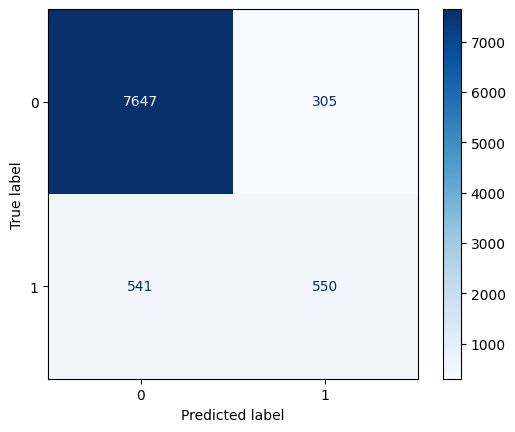

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix for the best model XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


XGBoost ROC-AUC Score: 0.9289613713444738


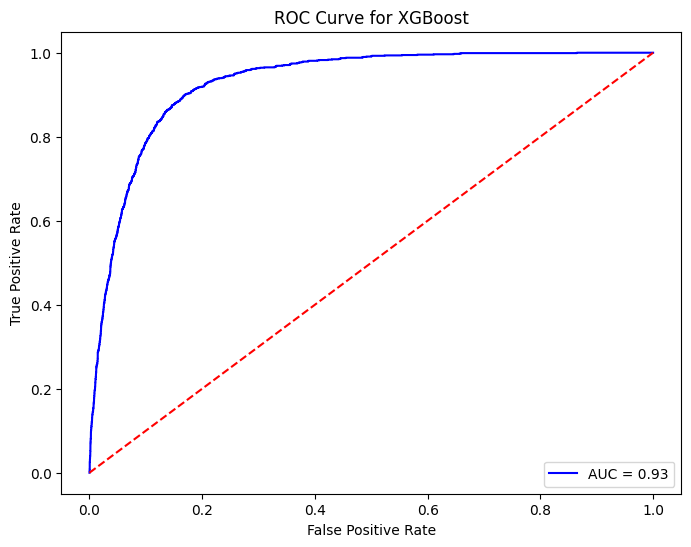

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC-AUC Score for Random Forest
auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"XGBoost ROC-AUC Score: {auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# Feature Importance in XGBoost

In [62]:
# Feature Importance for xgb_model
import pandas as pd
import numpy as np

# Get feature importance from the trained model
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to display the importance of each feature
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(importance_df.head(10))


             Feature  Importance
40  poutcome_success    0.255527
27   contact_unknown    0.080573
34         month_mar    0.072684
3           duration    0.051856
24       housing_yes    0.038562
33         month_jun    0.036154
38         month_sep    0.032699
37         month_oct    0.031732
29         month_dec    0.027090
32         month_jul    0.024984


# Resampling with SMOTE

In [63]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_train_resampled)}")


Original class distribution: Counter({False: 31970, True: 4198})
Resampled class distribution: Counter({False: 31970, True: 31970})


In [64]:
# Calculate the class weight ratio
scale_pos_weight = len(y_train) / (2 * sum(y_train == 1))  # Assumes '1' is the minority class
print(f"Scale Pos Weight: {scale_pos_weight}")


Scale Pos Weight: 4.307765602667937


In [67]:
import xgboost as xgb

# Initialize and train the XGBoost model with class weight adjustment
xgb_models = xgb.XGBClassifier(
    n_estimators=100,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
xgb_models.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate the model
y_pred_xgb = xgb_models.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8685170850381511
XGBoost Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.87      0.92      7952
        True       0.47      0.83      0.60      1091

    accuracy                           0.87      9043
   macro avg       0.72      0.85      0.76      9043
weighted avg       0.91      0.87      0.88      9043



Updated Accuracy: 0.8685170850381511
Updated Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.87      0.92      7952
        True       0.47      0.83      0.60      1091

    accuracy                           0.87      9043
   macro avg       0.72      0.85      0.76      9043
weighted avg       0.91      0.87      0.88      9043



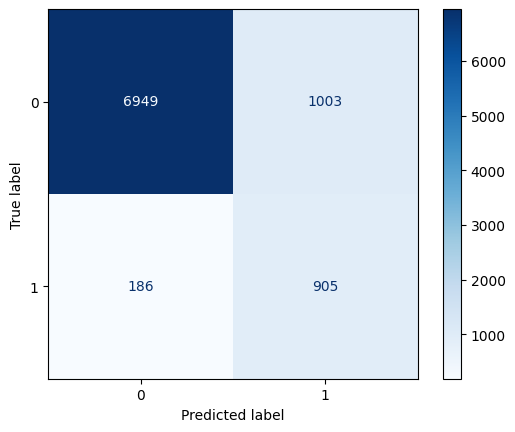

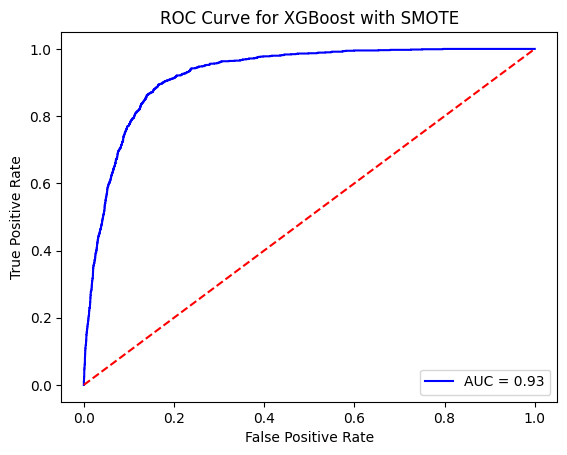

XGBoost ROC-AUC Score: 0.9252321905770093


In [68]:
# Evaluate the model
print("Updated Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Updated Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

# ROC-AUC Curve
aucs = roc_auc_score(y_test, xgb_models.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, xgb_models.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue', label=f'AUC = {aucs:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve for XGBoost with SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()



from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC-AUC Score for Random Forest
auc = roc_auc_score(y_test, xgb_models.predict_proba(X_test)[:, 1])
print(f"XGBoost ROC-AUC Score: {auc}")


In [82]:
# Get feature importance from the trained model
feature_importance = xgb_models.feature_importances_

# Create a DataFrame to display the importance of each feature
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(importance_df.head(10))

             Feature  Importance
40  poutcome_success    0.156417
27   contact_unknown    0.089974
34         month_mar    0.073118
37         month_oct    0.072756
3           duration    0.063644
4           campaign    0.055188
33         month_jun    0.043158
35         month_may    0.040273
38         month_sep    0.032519
24       housing_yes    0.026606
